In [1]:
# Let us first begin with importing the required dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('fakeaccount.csv')
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [3]:
#basic information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [4]:
#some statistical summary of the data
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [5]:
# checking once again if there are any null values 
# though that has already been checked in the info I like to follow some steps in my EDA
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

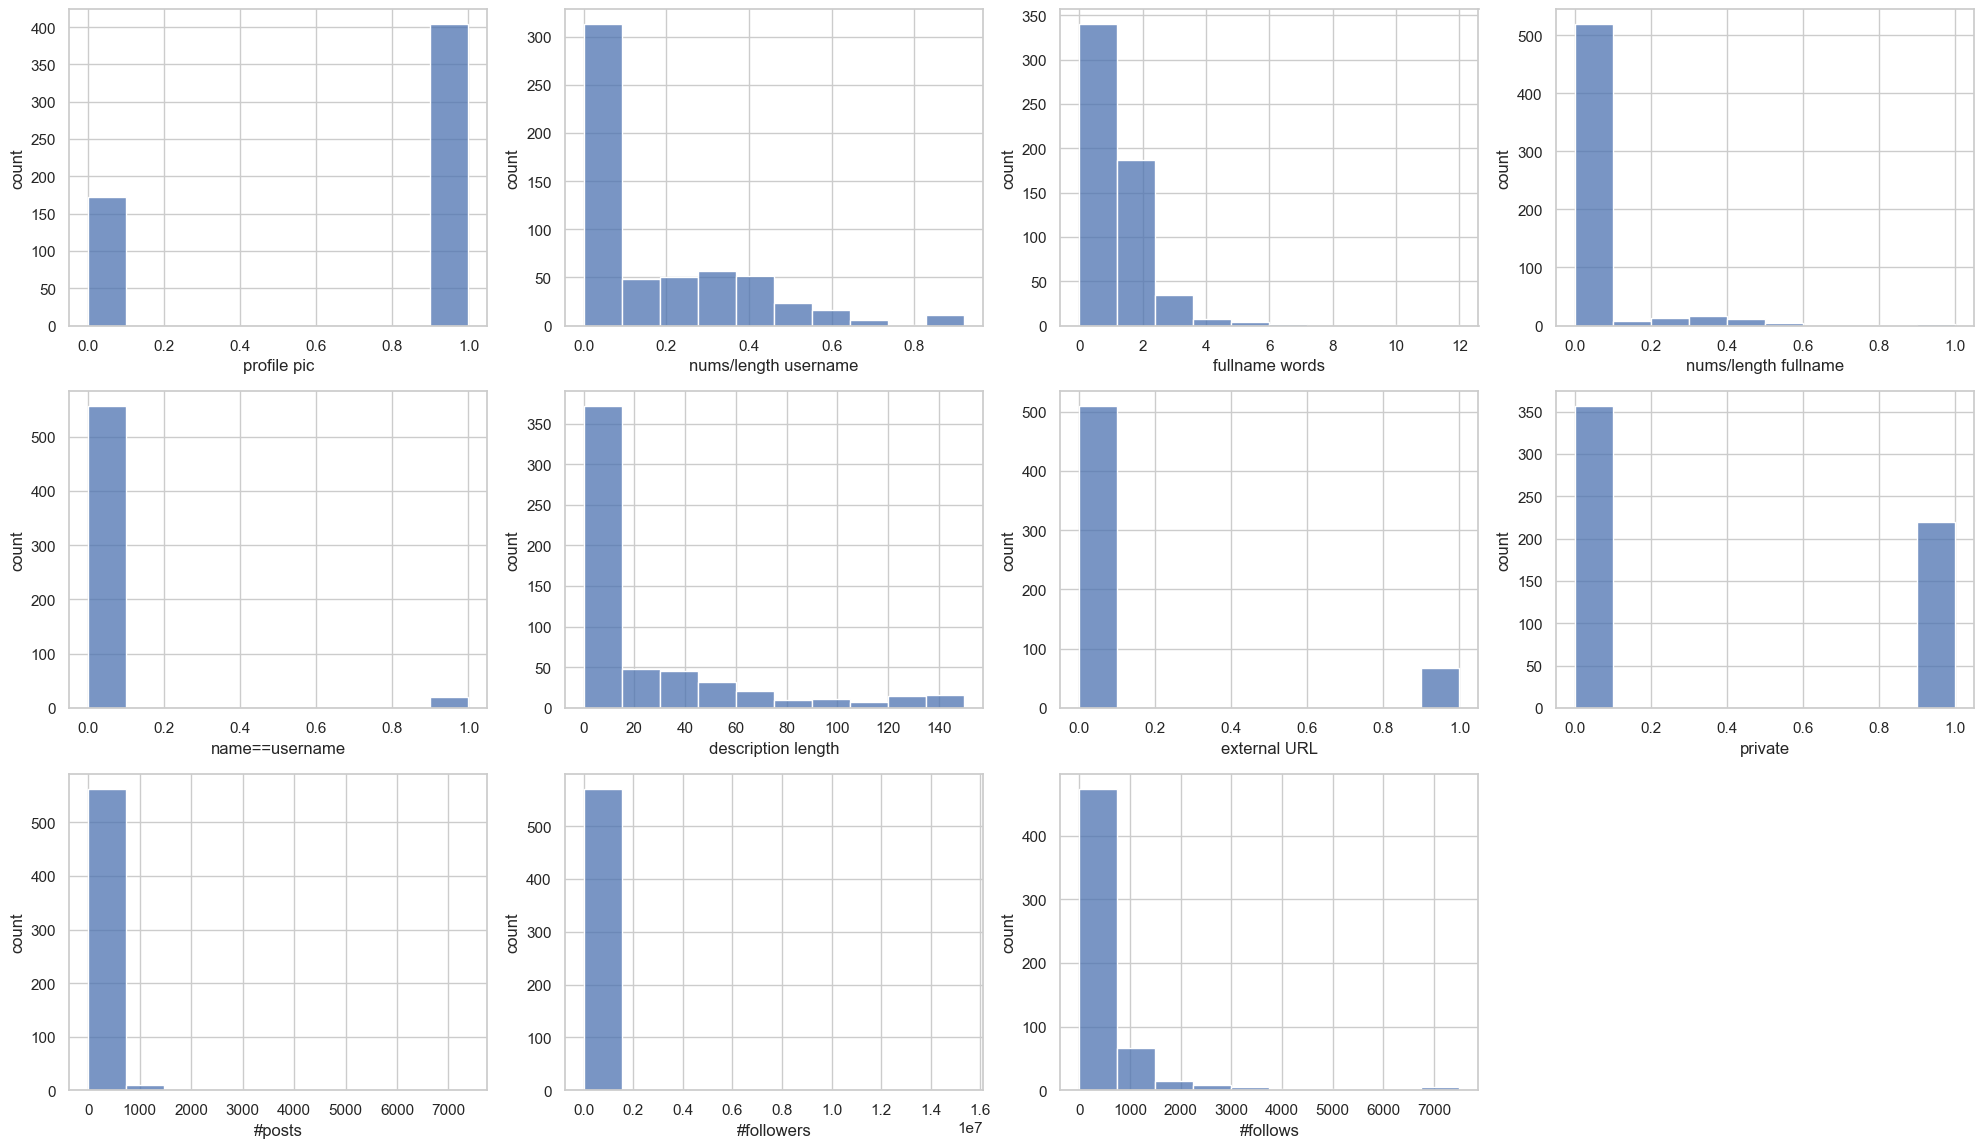

In [6]:
# Set the style of seaborn plot
sns.set(style="whitegrid")

# List of features
features = ['profile pic', 'nums/length username', 'fullname words', 'nums/length fullname', 'name==username', 
            'description length', 'external URL', 'private', '#posts', '#followers', '#follows']
count="count"
# Plot histograms for each feature
plt.figure(figsize=(20,15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[feature], kde=False, bins=10
                )
    plt.ylabel(count)
plt.tight_layout()
plt.show()

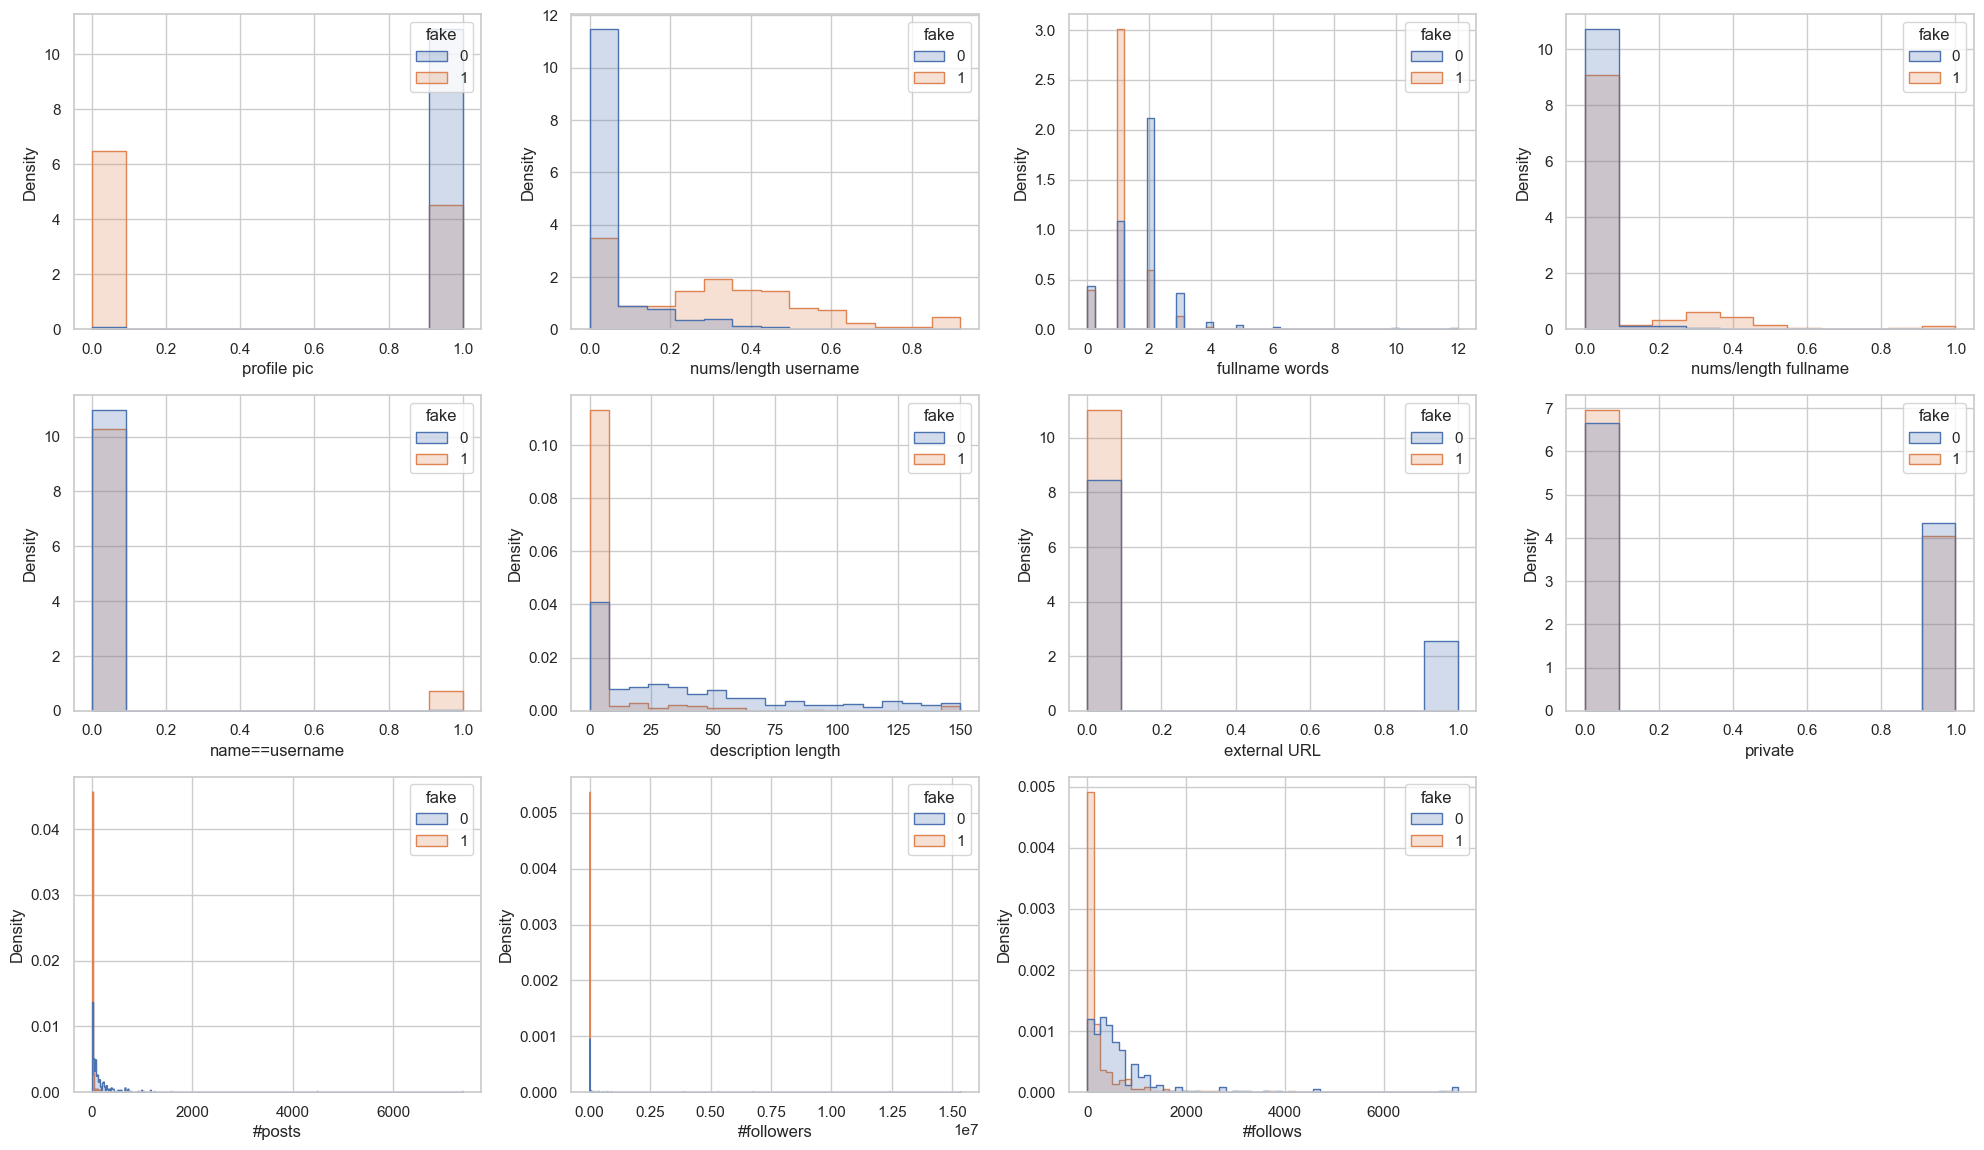

In [7]:
# Plot the distribution of each feature with respect to the target variable 'fake'
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(4, 4, i+1)
    sns.histplot(data=df, x=feature, hue='fake', element="step", stat="density", common_norm=False)
plt.tight_layout()
plt.show()

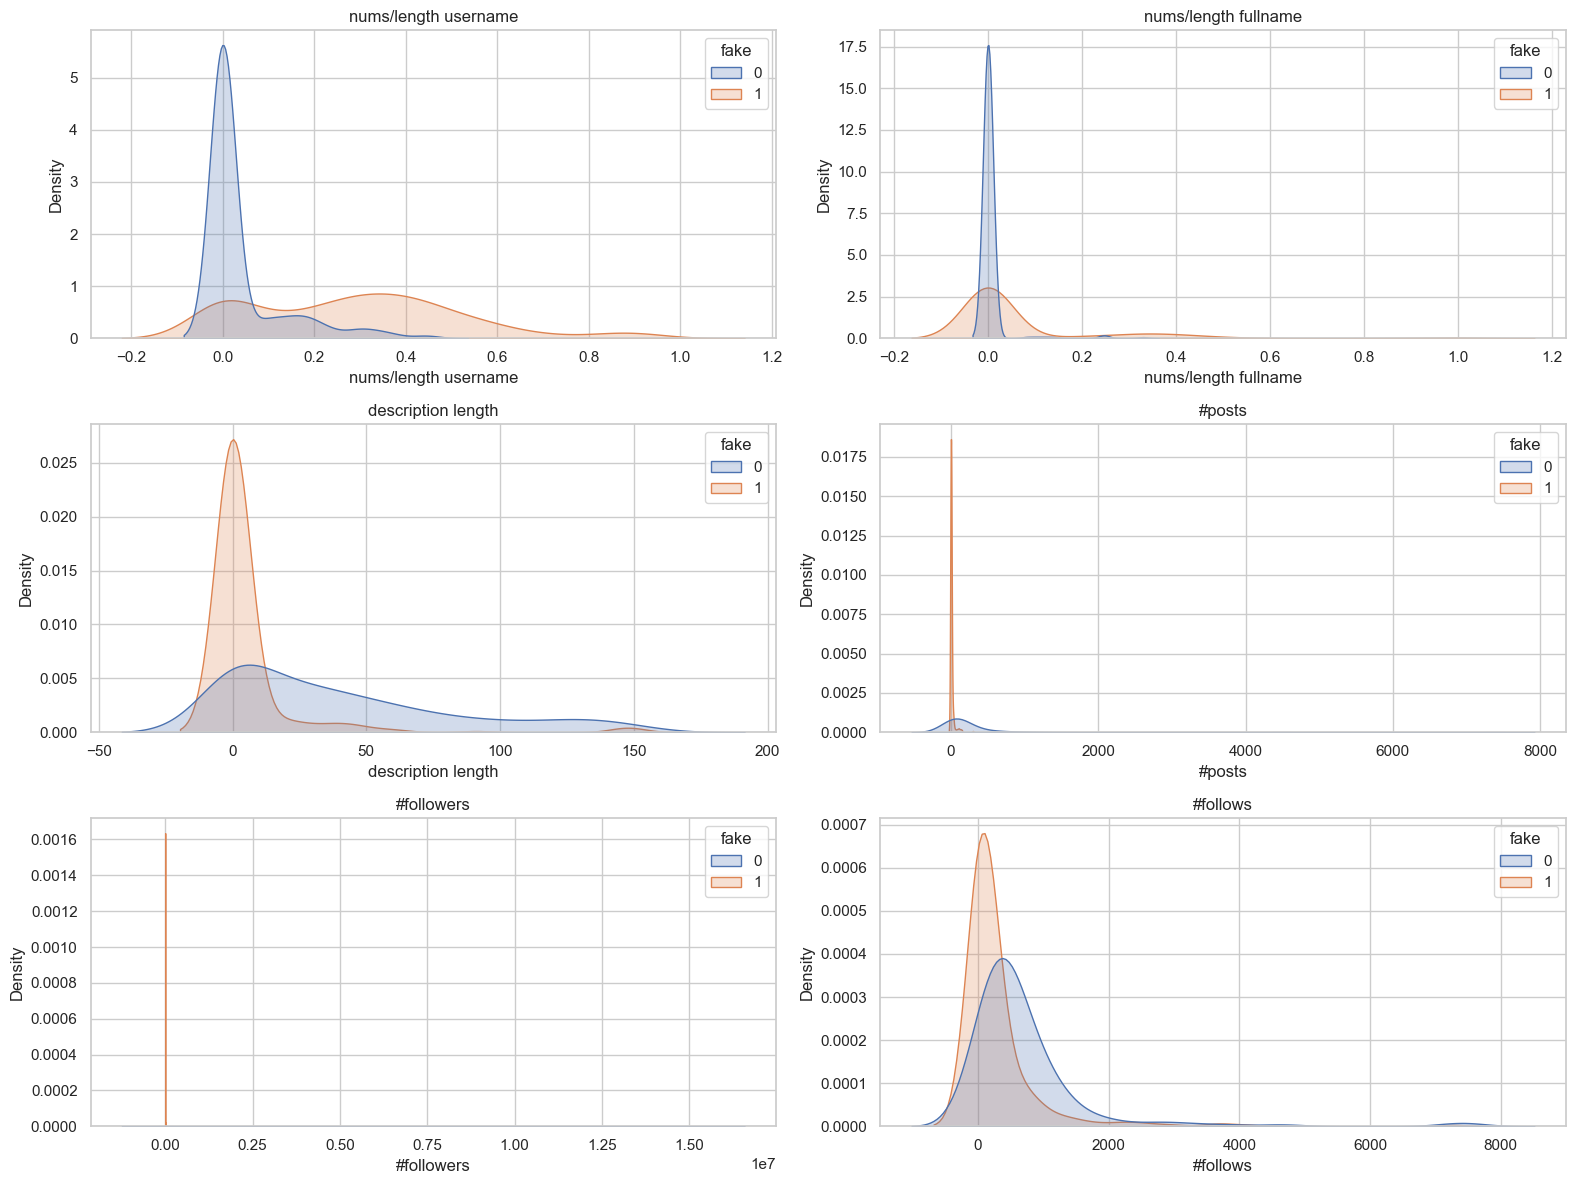

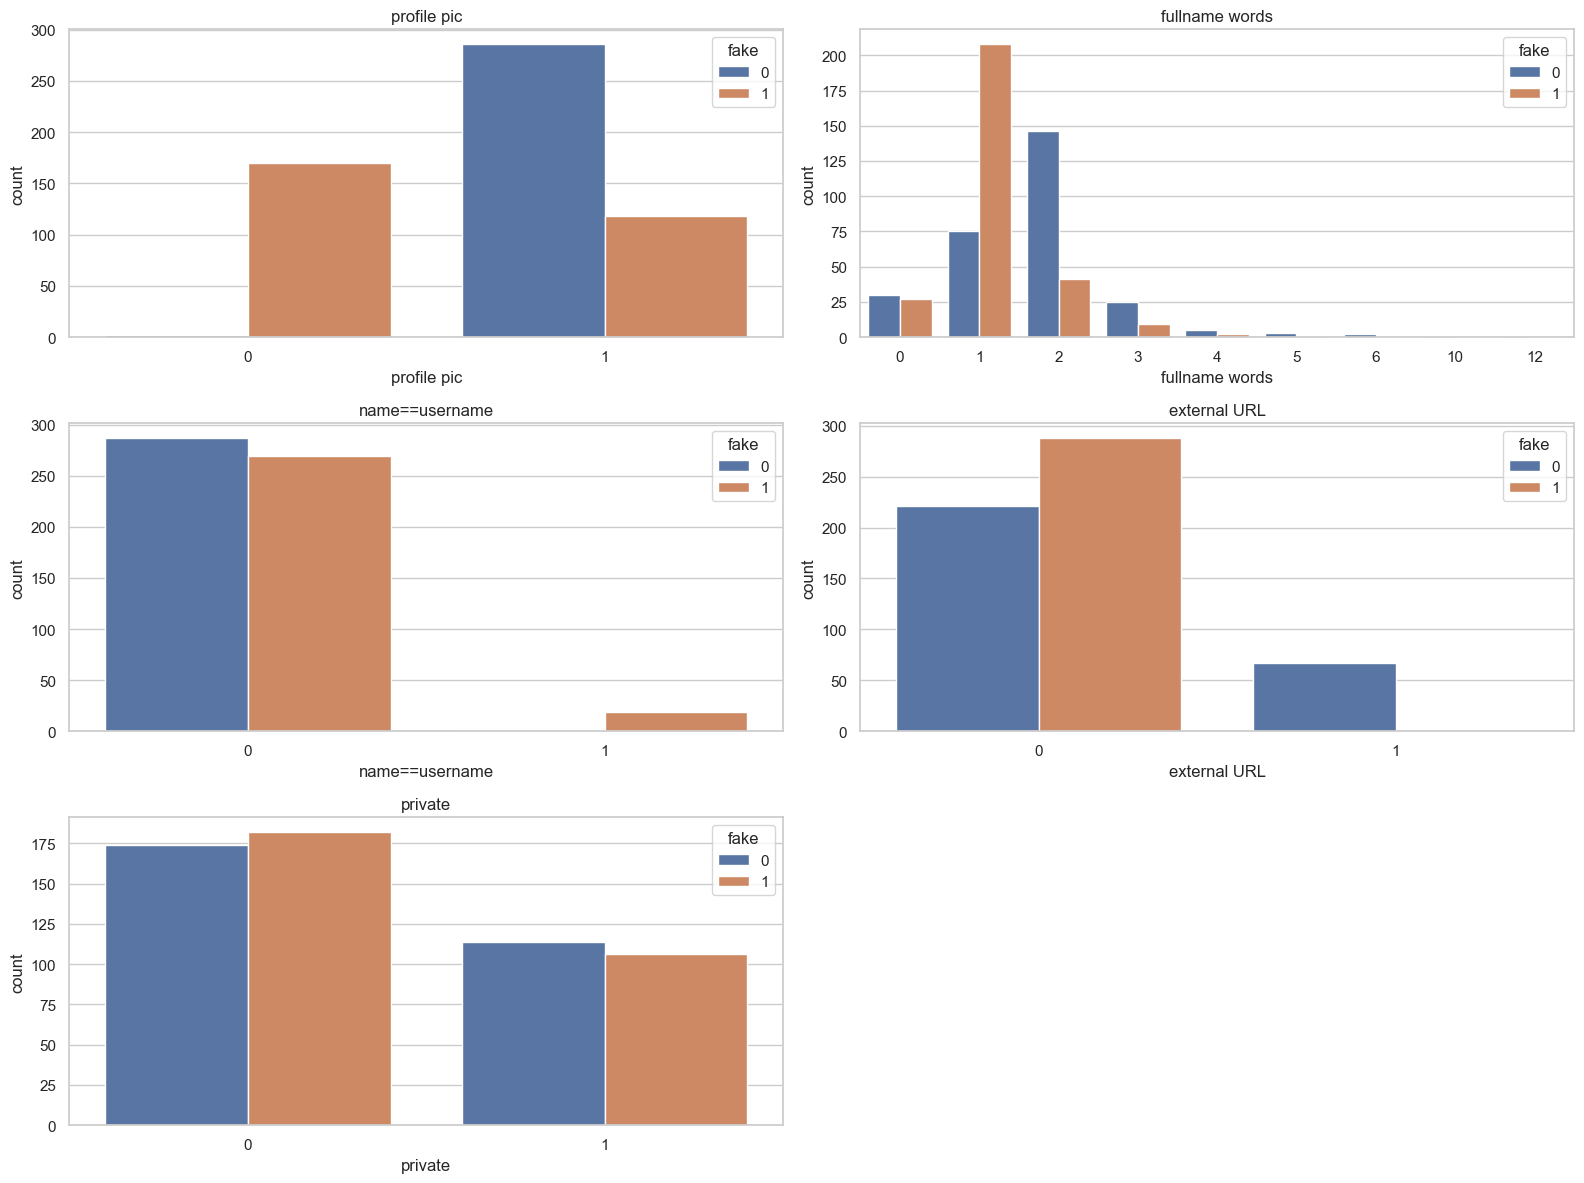

In [8]:
# Define the features as either continuous or categorical based on the number of unique values
continuous_features = [f for f in features if df[f].nunique() > 10]
categorical_features = [f for f in features if df[f].nunique() <= 10]

# Plot KDE plots for each continuous feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(continuous_features):
    plt.subplot(3, 2, i+1)
    sns.kdeplot(data=df, x=feature, hue="fake", fill=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

# Plot bar plots for each categorical feature
plt.figure(figsize=(16, 12))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 2, i+1)
    sns.countplot(data=df, x=feature, hue="fake")
    plt.title(feature)
plt.tight_layout()
plt.show()

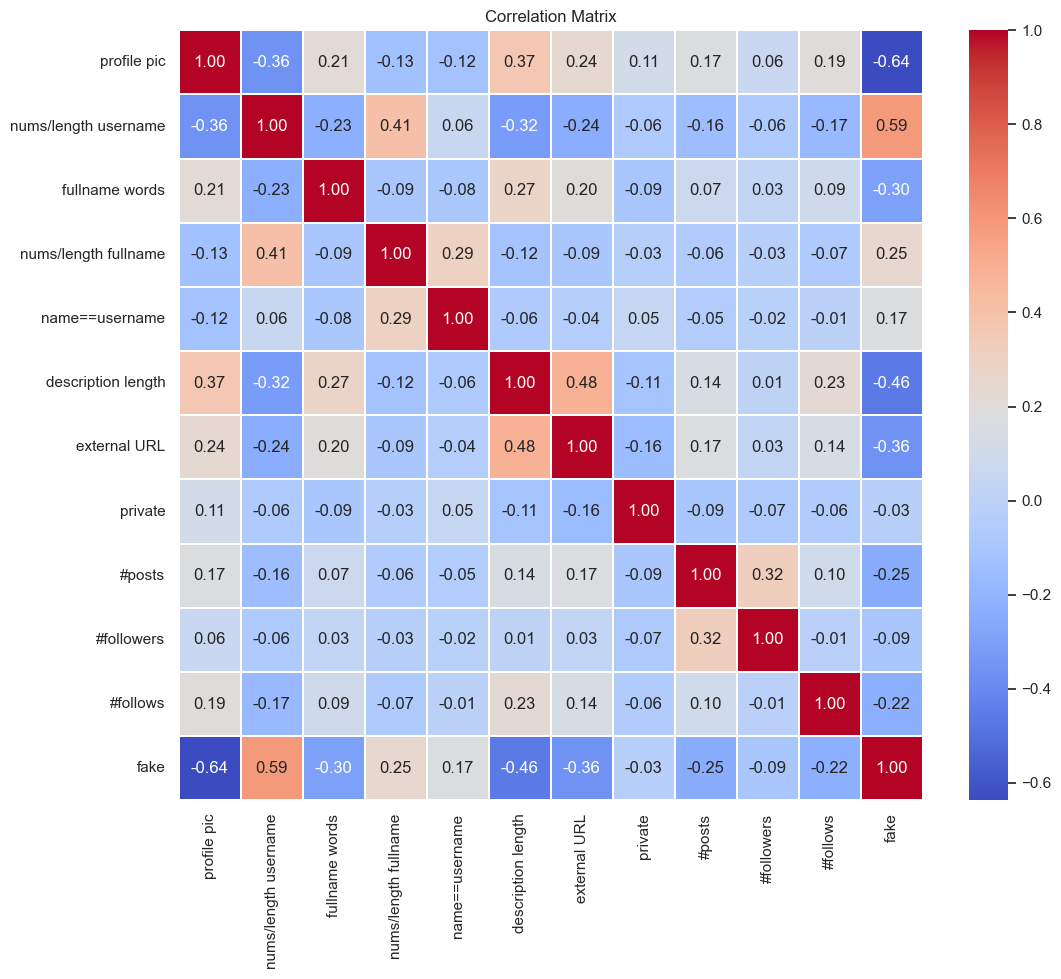

In [9]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.1)
plt.title("Correlation Matrix")
plt.show()

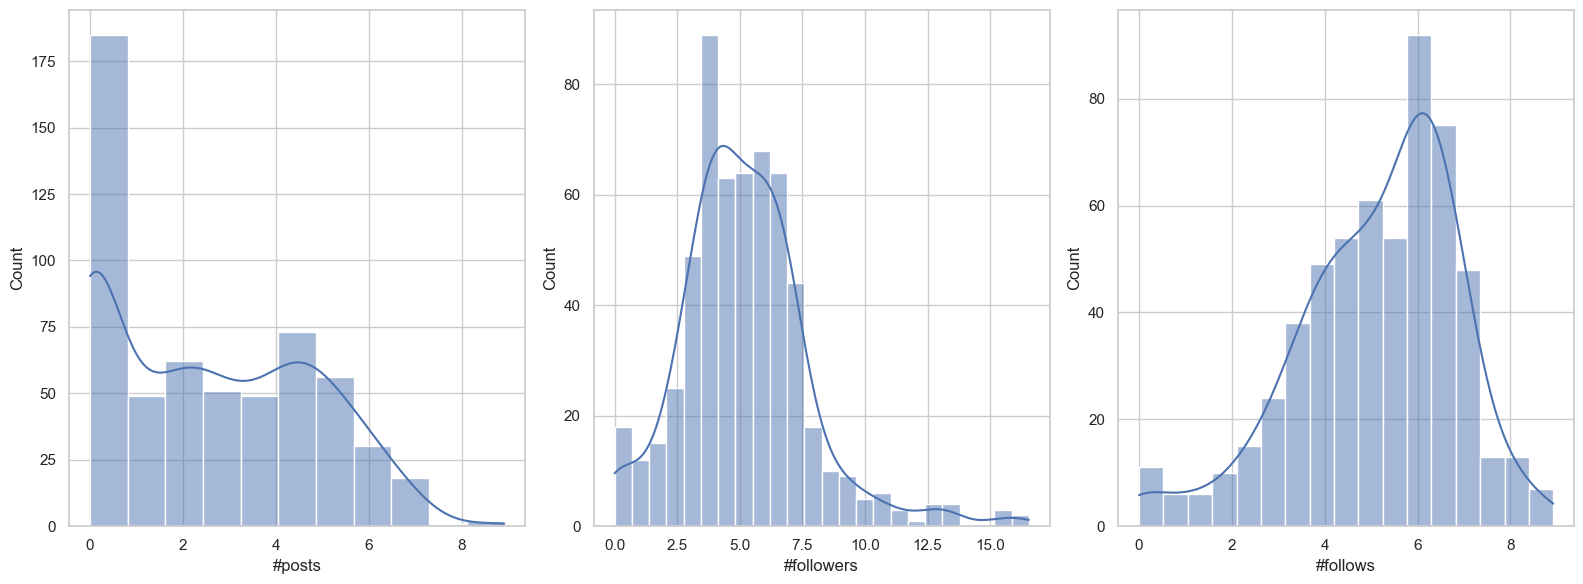

In [10]:
# List of features with outliers
features_with_outliers = ['#posts', '#followers', '#follows']

# Apply log transformation
for feature in features_with_outliers:
    df[feature] = np.log1p(df[feature])

# Visualize the transformed features
plt.figure(figsize=(16, 6))
for i, feature in enumerate(features_with_outliers):
    plt.subplot(1, 3, i+1)
    sns.histplot(data=df, x=feature, kde=True)
plt.tight_layout()
plt.show()

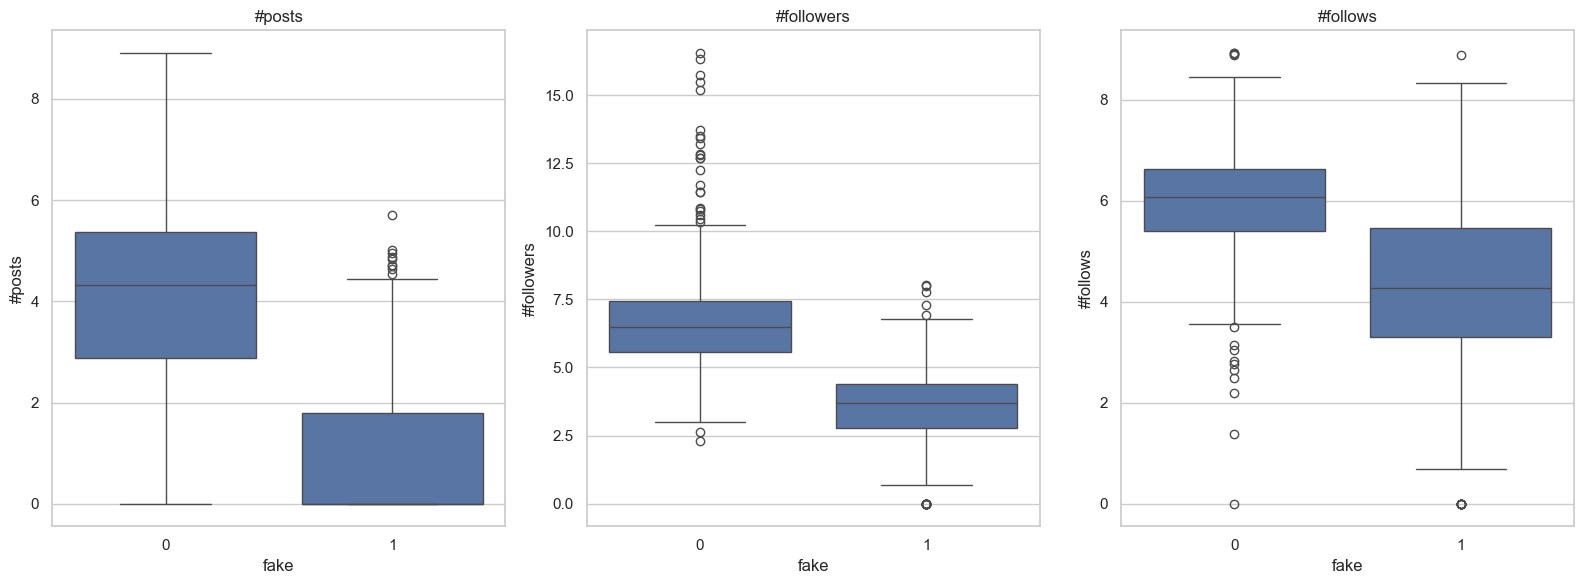

In [11]:
# Create a boxplot for each feature, separated by 'fake'
plt.figure(figsize=(16, 6))
for i, feature in enumerate(features_with_outliers):
    plt.subplot(1, 3, i+1)
    sns.boxplot(data=df, x='fake', y=feature)
    plt.title(feature)
plt.tight_layout()
plt.show()

In [12]:
X = df.drop('fake', axis=1)
y = df['fake']

In [13]:
# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [25]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [26]:
# Print a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93        63
           1       0.94      0.89      0.91        53

    accuracy                           0.92       116
   macro avg       0.92      0.92      0.92       116
weighted avg       0.92      0.92      0.92       116



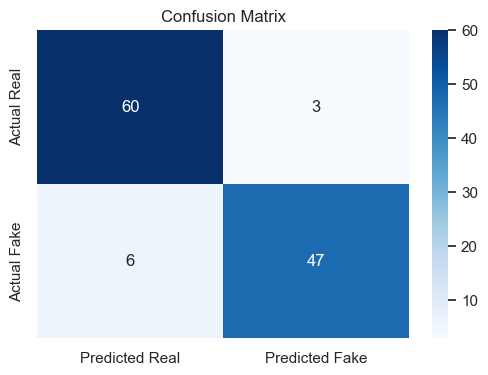

In [27]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Real', 'Actual Fake'], columns=['Predicted Real', 'Predicted Fake'])

# Visualize the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [28]:
import joblib

# Save the trained model to a file
joblib.dump(model, 'logistic_regression_model.joblib')

# You can also save the scaler for later use
joblib.dump(scaler, 'standard_scaler.joblib')


['standard_scaler.joblib']